<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/neural_nets/pytorch_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision with PyTorch - CIFAR-10

This notebook explores the use of PyTorch to apply a convolutional neural network (CNN) for image classification on the CIFAR-10 image dataset.

The model is not optimised - improvements can be made for this architecture through exploration of different hyperparameter settings.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

# Train
trainset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Test
testset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:02<00:00, 84306316.39it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
def imshow(img):
    """
    Image display function
    """
    img = img / 2 + 0.5  # unnormalise
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


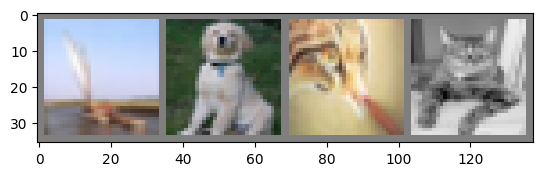

ship  dog   cat   cat  


In [5]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

## CNN model

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
# Loop over the dataset multiple times
for epoch in range(5):

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimise
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # Print statistics every 2000 mini-batches
        if i % 2000 == 1999:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.202
[1,  4000] loss: 1.924
[1,  6000] loss: 1.719
[1,  8000] loss: 1.573
[1, 10000] loss: 1.507
[1, 12000] loss: 1.465
[2,  2000] loss: 1.401
[2,  4000] loss: 1.379
[2,  6000] loss: 1.355
[2,  8000] loss: 1.300
[2, 10000] loss: 1.302
[2, 12000] loss: 1.265
[3,  2000] loss: 1.193
[3,  4000] loss: 1.201
[3,  6000] loss: 1.208
[3,  8000] loss: 1.203
[3, 10000] loss: 1.191
[3, 12000] loss: 1.145
[4,  2000] loss: 1.089
[4,  4000] loss: 1.100
[4,  6000] loss: 1.113
[4,  8000] loss: 1.106
[4, 10000] loss: 1.104
[4, 12000] loss: 1.085
[5,  2000] loss: 1.010
[5,  4000] loss: 1.041
[5,  6000] loss: 1.026
[5,  8000] loss: 1.045
[5, 10000] loss: 1.041
[5, 12000] loss: 1.035
Finished Training


In [ ]:
# Save the model
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)

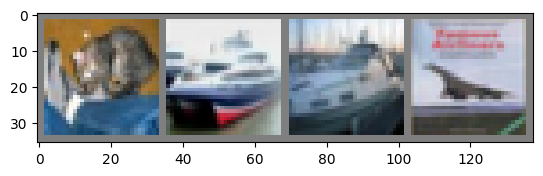

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

In [11]:
outputs = net(images.to(device))

In [12]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join(f"{classes[predicted[j]]:5s}"
                              for j in range(4)))

Predicted:  cat   car   plane plane


In [14]:
correct = 0
total = 0
# In testing we don't need to calculate gradients for outputs
with torch.no_grad():

    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        # Calculate outputs by running images through network
        outputs = net(inputs)
        # Class with highest energy is chosen as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of network on 10,000 test images: {100 * correct // total:.2f}%")

Accuracy of network on 10,000 test images: 58.00%


In [15]:
# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# Again no gradients needed
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predictions = torch.max(outputs, 1)
        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class: {classname:5s} = {accuracy:.2f}%")

Accuracy for class: plane = 78.10%
Accuracy for class: car   = 81.20%
Accuracy for class: bird  = 31.00%
Accuracy for class: cat   = 52.40%
Accuracy for class: deer  = 40.70%
Accuracy for class: dog   = 46.70%
Accuracy for class: frog  = 69.40%
Accuracy for class: horse = 70.20%
Accuracy for class: ship  = 59.40%
Accuracy for class: truck = 53.50%
